In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 加载数据
file_path_Mix_dataset_One_Hot = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot.csv"
file_path_Mix_dataset_Label_Encoding = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding.csv"
# 加载数据
final_data = pd.read_csv(file_path_Mix_dataset_Label_Encoding, header=0)
final_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,-0.132017,-0.719829,0.733734,0
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,2.235956,0.753338,0.733734,0
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,-0.132017,1.060247,-0.707737,1
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,-0.132017,-0.474301,0.733734,0
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,-0.132017,-0.474301,0.733734,0


In [3]:
# 假设最后一列是标签
X = final_data.iloc[:, :-1]  # 特征
y = final_data.iloc[:, -1]   # 标签

Number of components to keep for 90% variance: 21


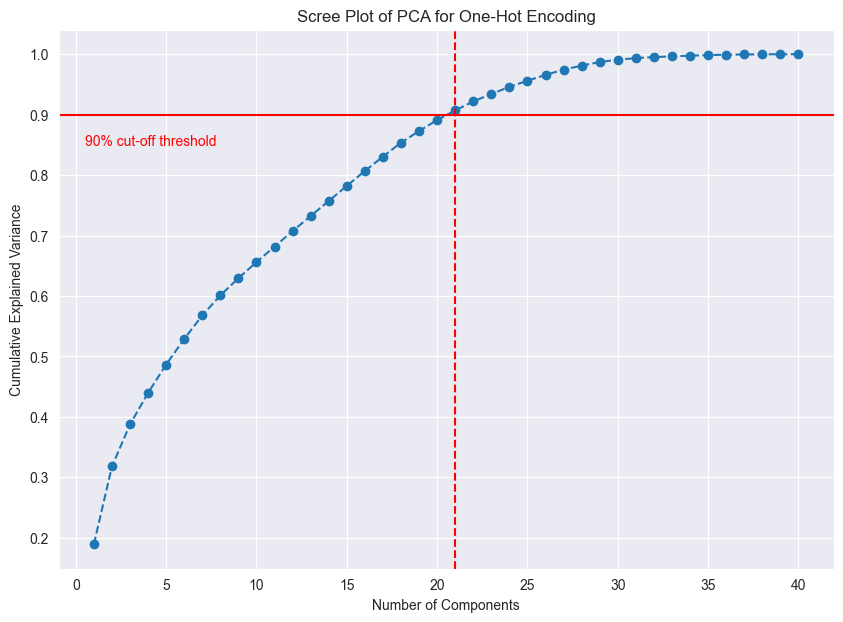

In [4]:
# 使用PCA，但不限制主成分的数量，以便计算总方差
pca = PCA().fit(X)

# 累积解释方差率
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 确定维数：假设我们想要的累积解释方差率是90%
n_components = np.where(cumulative_variance_ratio >= 0.90)[0][0] + 1

# 输出需要保留的主成分数量
print(f"Number of components to keep for 90% variance: {n_components}")

# 绘制Scree Plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot of PCA for One-Hot Encoding')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red')
plt.axvline(x=n_components, color='r', linestyle='--')
# 显示图像
plt.show()

In [5]:
# 假设n_components是你确定的组件数
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # 使用标准化后的数据进行降维

# 假设y是你的目标变量
y_np = y.values.reshape(-1, 1)

from sklearn.decomposition import PCA
import pickle

# 保存PCA模型到磁盘
with open('./resource/preprocessor/label_pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

# 合并降维数据与目标变量
merged_data = np.concatenate((X_pca, y_np), axis=1)

# 保存数据
# 将合并后的数据转换为DataFrame
merged_df = pd.DataFrame(merged_data)

# 保存为CSV文件
# merged_df.to_csv(r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_PCA.csv", index=False)

In [6]:
# from joblib import dump, load
# 
# # 保存PCA模型
# dump(pca, 'pca_model.joblib')
# 
# # 之后可以这样加载模型
# pca_loaded = load('pca_model.joblib')
# 
# # # 使用加载的模型对新数据或相同的数据进行降维
# # X_pca_loaded = pca_loaded.transform(X_new)  # 假设X_new是你想要降维的新数据

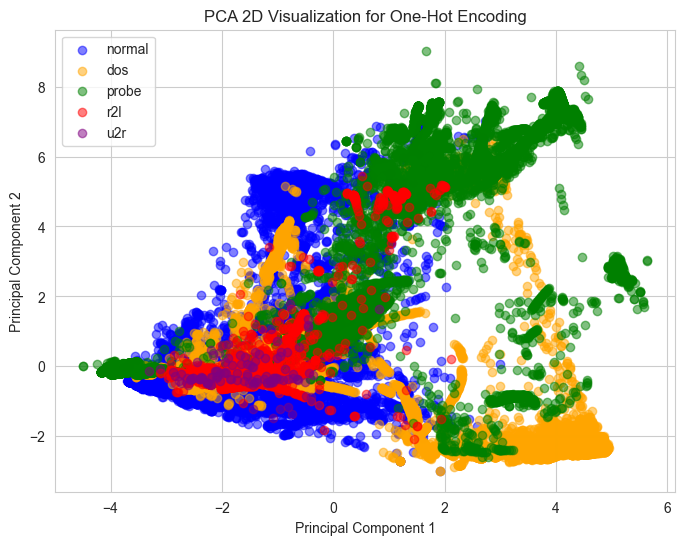

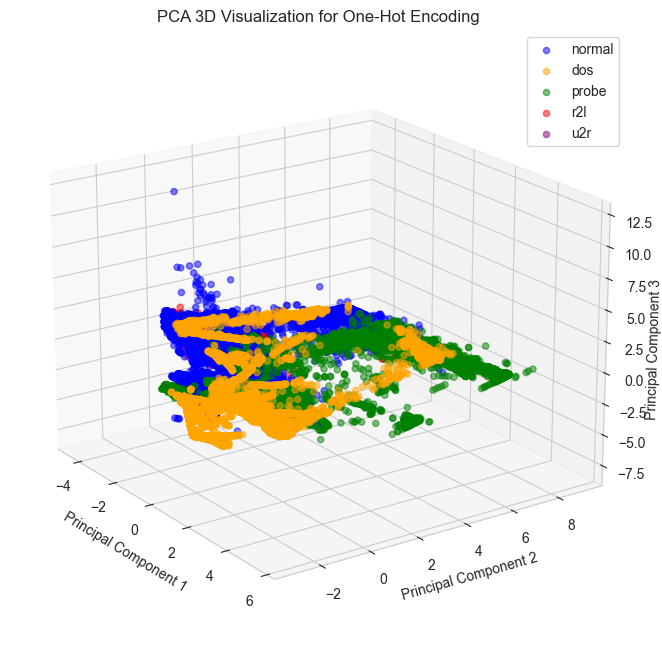

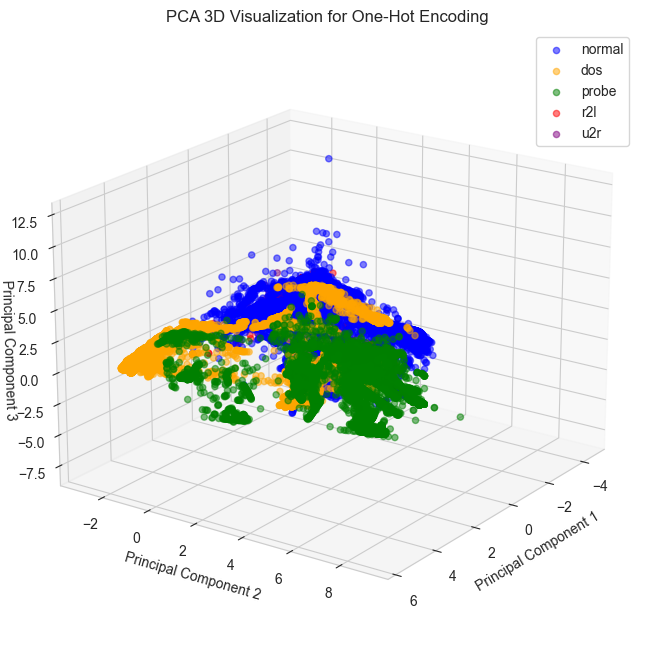

In [6]:
# label_dict = {0: 'normal', 1: 'dos', 2: 'probe', 3: 'r2l', 4: 'u2r'}
# # 假设y是一个numpy数组，包含了目标变量的数字编码
# y_labels = np.array([label_dict[label[0]] for label in y_np])  # 使用label[0]是因为y已经被reshape为(-1, 1)
# 
# plt.figure(figsize=(8, 6))
# for label, color in zip(label_dict.values(), ['blue', 'orange', 'green', 'red', 'purple']):
#     idx = np.where(y_labels == label)
#     plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, c=color, alpha=0.5)  # 添加alpha以改善可视化效果
# plt.title("PCA 2D Visualization for One-Hot Encoding")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.show()
# 
# if n_components >= 3:
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     for label, color in zip(label_dict.values(), ['blue', 'orange', 'green', 'red', 'purple']):
#         idx = np.where(y_labels == label)
#         ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=label, c=color, alpha=0.5)
#     ax.set_title("PCA 3D Visualization for One-Hot Encoding")
#     ax.set_xlabel("Principal Component 1")
#     ax.set_ylabel("Principal Component 2")
#     ax.set_zlabel('Principal Component 3', labelpad=-1.5)  # labelpad是标签与坐标轴的距离，可以根据需要调整
#     # 调整视角
#     ax.view_init(elev=20, azim=-35)  # elev是仰角，azim是方位角，这里的值可以根据需要调整
#     plt.legend()
#     plt.show()
#     
# if n_components >= 3:
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     for label, color in zip(label_dict.values(), ['blue', 'orange', 'green', 'red', 'purple']):
#         idx = np.where(y_labels == label)
#         ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=label, c=color, alpha=0.5)
#     ax.set_title("PCA 3D Visualization for One-Hot Encoding")
#     ax.set_xlabel("Principal Component 1")
#     ax.set_ylabel("Principal Component 2")
#     ax.set_zlabel('Principal Component 3', labelpad=-1.5)  # labelpad是标签与坐标轴的距离，可以根据需要调整
#     # 调整视角
#     ax.view_init(elev=20, azim=35)  # elev是仰角，azim是方位角，这里的值可以根据需要调整
#     plt.legend()
#     plt.show()

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# 进行LDA降维到类别数-1
n_classes = len(np.unique(y))  # 假设y已经是包含类别标签的numpy数组
lda = LDA(n_components=n_classes-1)
X_lda = lda.fit_transform(X, y)

with open('./resource/preprocessor/label_lda_model.pkl', 'wb') as file:
    pickle.dump(lda, file)

In [7]:
# 确保y是一维数组以便合并
y_array = np.array(y).reshape(-1, 1)
# 合并降维数据与编码后的标签
merged_data = np.concatenate((X_lda, y_array), axis=1)
# 转换为DataFrame
merged_df = pd.DataFrame(merged_data)
# 保存合并后的数据为CSV文件
# merged_df.to_csv(r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_LDA.csv", index=False)

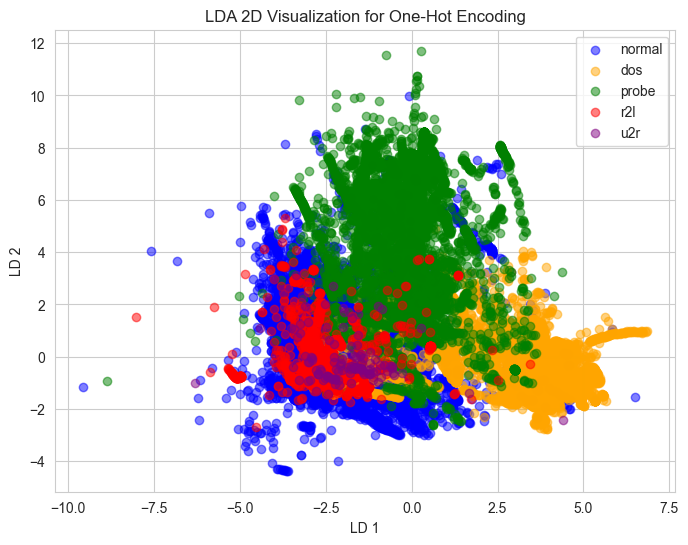

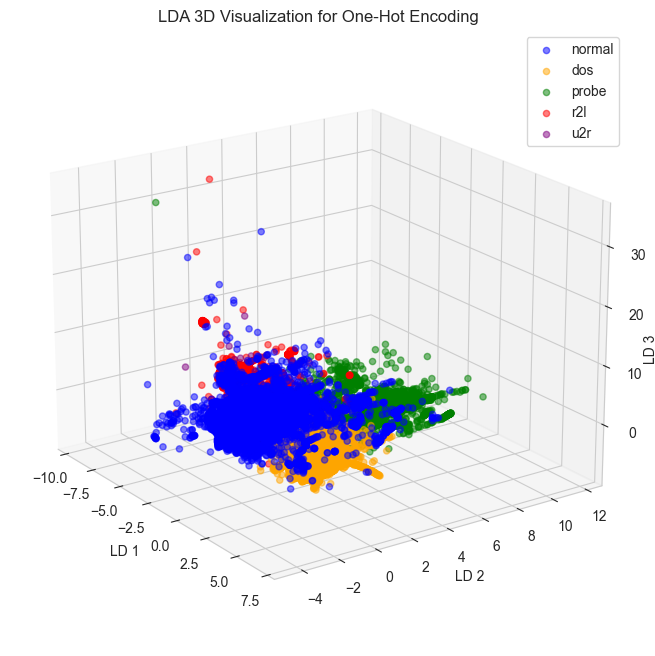

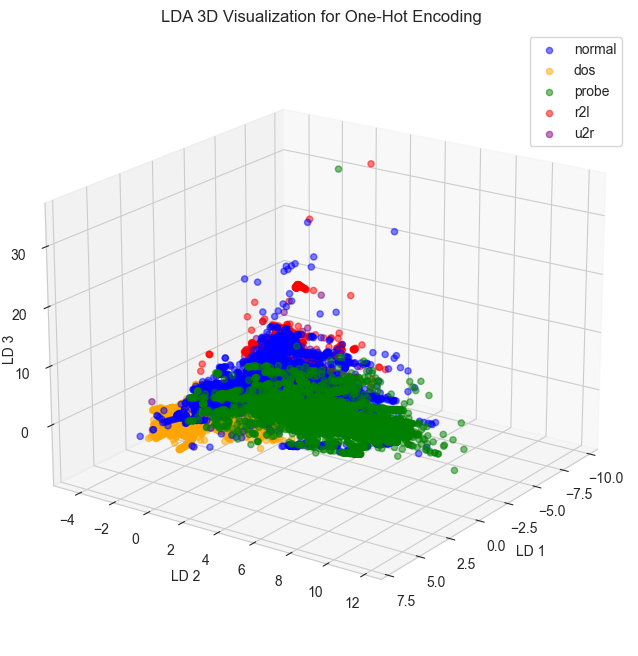

In [8]:
# # 转换标签为具体攻击类型
# label_dict = {0: 'normal', 1: 'dos', 2: 'probe', 3: 'r2l', 4: 'u2r'}
# y_labels = np.array([label_dict[label] for label in y])
# 
# plt.figure(figsize=(8, 6))
# colors = ['blue', 'orange', 'green', 'red', 'purple']  # 定义颜色数组
# for label, color in zip(label_dict.values(), colors):
#     idx = np.where(y_labels == label)
#     plt.scatter(X_lda[idx, 0], X_lda[idx, 1], label=label, c=color, alpha=0.5)
# plt.title("LDA 2D Visualization for One-Hot Encoding")
# plt.xlabel("LD 1")
# plt.ylabel("LD 2")
# plt.legend()
# plt.show()
# 
# if n_classes-1 >= 3:
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     for label, color in zip(label_dict.values(), colors):
#         idx = np.where(y_labels == label)
#         ax.scatter(X_lda[idx, 0], X_lda[idx, 1], X_lda[idx, 2], label=label, c=color, alpha=0.5)
#     ax.set_title("LDA 3D Visualization for One-Hot Encoding")
#     ax.set_xlabel("LD 1")
#     ax.set_ylabel("LD 2")
#     ax.set_zlabel("LD 3", labelpad=-3, rotation=90)
#     ax.view_init(elev=20, azim=-35)  # 调整3D图的视角
#     plt.legend()
#     plt.show()
#     
# if n_classes-1 >= 3:
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
#     for label, color in zip(label_dict.values(), colors):
#         idx = np.where(y_labels == label)
#         ax.scatter(X_lda[idx, 0], X_lda[idx, 1], X_lda[idx, 2], label=label, c=color, alpha=0.5)
#     ax.set_title("LDA 3D Visualization for One-Hot Encoding")
#     ax.set_xlabel("LD 1")
#     ax.set_ylabel("LD 2")
#     ax.set_zlabel("LD 3", labelpad=-5, rotation=90)
#     ax.view_init(elev=20, azim=35)  # 调整3D图的视角
#     plt.legend()
#     plt.show()